For comparison with ESN, I will try LSTM implemented by 'Chainer'

# Prepare for the environment and Fetch Data

In [2]:
!　pip install matplotlib --upgrade
! pip install quandl


#generic
%matplotlib inline
from __future__ import print_function

import numpy as np
import time
import quandl 
import matplotlib.pyplot as plt

from yahoo_finance import Share



def get_data_by_key(key, data):
    data_it = iter(data)
    return_data = []
    flag = True
    for d in data_it:
        return_data.append(d[key])
        
    return np.array(return_data)

def get_data_by_list(name_list, start_date, end_date, data_type="Open"):
    share_list = []
    for name in name_list:
        share_list.append(Share(name))
    
    stock_data_list = []
    date = []
    flag = True
    N_data = 0
    fail_name_list = []
    for idx, share in enumerate(share_list):
        name = name_list[idx]
        hist_data = share.get_historical(start_date=start_date, end_date=end_date)
        stock_data = map(float, get_data_by_key(key=data_type, data=hist_data))
        date.append(get_data_by_key(key='Date', data=hist_data))
        stock_data_list.append(stock_data)
        N_data = len(stock_data)
        if N_data == 0:
            fail_name_list.append(name)
    print ("fail_name_list: ", fail_name_list)
    return np.array(stock_data_list).T, date

Requirement already up-to-date: matplotlib in /usr/local/lib/python2.7/dist-packages
Requirement already up-to-date: numpy>=1.6 in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Requirement already up-to-date: python-dateutil in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Requirement already up-to-date: pytz in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Requirement already up-to-date: cycler in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Requirement already up-to-date: pyparsing!=2.0.4,>=1.5.6 in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Cleaning up...
Cleaning up...


In [3]:
energy = ["PTR", "XOM", "CVX", "RDS-A", "BP", "TOT", "SLB", "KMI", "COP", "CEO", 
          "E", "STO", "OXY", "PBR", "EOG", "APC", "SU", "ENB", "HAL", "WMB"]
financial = ["WFC", "JPM", "HSBC", "BAC", "C", "SAN", "MTU", "RY", "WBK", "TD", "GS", 
             "LYG", "AXP", "AIG", "MS", "ITUB", "BCS", "BBVA"]
healthcare = ["NVS", "JNJ", "PFE", "MRK", "GILD", "SNY", "AMGN", "NVO", "GSK", "UNH",
             "MDT", "BMY", "CELG", "BIIB", "AZN", "LLY", "ABT", "AGN", "VRX", "TEVA",
             "TMO", "SHPG", "REGN"]
buisiness = ["ACN", "LMT", "CNI", "FDX", "DAL", "CSX", "AAL", "CP", "NSC", "NOC", "LUV"]
telecom = ["CHL", "VZ", "T", "VOD", "NTT", "AMX", "CHA", "BT", "CHU", "ORAN", "BCE",
           "CHT", "SKM", "TI", "TU", "S", "TLK", "DUK", "NGG", "NEE", "D", "SO", "EXC", "KEP",
          "AEP", "SRE", "PCG", "HNP", "PPL", "PEG", "EIX", "ETP", "ED", "ENI", "XEL", "ES", "FE"]
hardware = ["AAPL", "ORCL", "IBM", "INTC", "CSCO", "TSM", "QCOM", "HPQ", "TXN", "EMC",
           "CAJ", "ASML", "ERIC", "SNE", "AVGO", "MU", "GLW", "NXPI", "NOK",
           "AMAT", "WDC", "WIT", "ADI", "STX", "APH"]
software = ["MSFT", "GOOGL", "BIDU", "EBAY", "SAP", "CRM", "YHOO", "VMW",
            "ADBE", "CTSH", "INFY", "INTU", "LNKD", "RHT", "NTES", "CHKP", 
            "CA", "ADSK", "AKAM", "NVDA"]
industrial = ["GE", "V", "MA", "UTX", "MMM", "BA", "UNP", "UPS", "HON", "DHR", "CAT", 
              "ABB", "GD", "ADP", "EMR", "ITW", "ECL", "TEL", "PCAR", "WM"]
manufacturing = ["TM", "HMC", "F", "GM", "JCI", "TSLA", "TTM", "CMI", "DLPH", "MGA",
                "CMI", "DLPH", "MGA", "GPC", "BWA", "HOG", "ALV", "HAR", "LEA", "LKQ", 
                 "WBC", "GT", "FCAU", "NSANY", "NAV"]
consumer = ["PG", "BUD", "KO", "PEP", "UL", "PM", "BTI", "MO", "ABEV", "DEO", "MDLZ",
            "CL", "MON", "MCK", "KMB", "WHR", "DIS", "CMCSA", "FOXA", "TWX", "TWC",
           "DISH", "CBS", "DISCA", "TV", "CHTR", "QVCA", "OMC", "NLSN", 
           "PSO", "SJR", "NFLX"]
diversified = ["BRK-A", "BRK-B", "UTX", "BC", "RTN", "OLN", "ITT", "MSBHY", "KWHIY", 
               "ABB", "IEP", "GE"]
retailing = ["WMT", "AMZN", "HD", "MCD", "NKE", "SBUX", "CVS", "WBA", "PCLN", "COST", 
            "TGT", "TJX", "LVS", "YUM", "CCL", "LUX", "DG", "M", "AZO", "ROST", "CMG", "GPS", 
            "DLTR", "RCL", "KSS", "HOT", "JWN"]

input_list = energy + financial + healthcare + buisiness + telecom\
+ hardware + software + industrial + manufacturing + consumer + diversified + retailing
print (len(input_list))

270


In [4]:
print ("Started!!")

st = time.time()
start_date="2014-04-01"
end_date="2016-04-01"
input_data, date = get_data_by_list(input_list, start_date=start_date, end_date=end_date) 
sp = quandl.get("YAHOO/INDEX_GSPC", start_date=start_date, end_date=end_date)
target_data = np.array(sp['Open'])
elapsed = time.time() - st
print ("time for getting training_data:", elapsed)

Started!!
fail_name_list:  []
time for getting training_data: 1250.30875397


# prepare for chainer

In [30]:
import chainer
from chainer import cuda, Function, gradient_check, Variable, optimizers, serializers, utils
from chainer import Link, Chain, ChainList
import chainer.functions as F
import chainer.links as L

# Offline Results

In [99]:
class LSTM(Chain):
    def __init__(self):
        super(LSTM, self).__init__(
            input = L.Linear(N_in, N_middle),
            mid = L.LSTM(N_middle, N_middle),
            output = L.Linear(N_middle, N_out),
        )
        
    def reset_state(self):
        self.mid.reset_state()
    
    def __call__(self, x):
        h1 = F.relu(self.input(x))
        h2 = F.relu(self.mid(h1))
        y = self.output(h2)
        return y
    
class Regression(Chain):
    def __init__(self, predictor):
        super(Regression, self).__init__(predictor=predictor)
        
    def __call__(self, x, y):
        output = self.predictor(x)
        self.loss = F.mean_squared_error(output, y)
        return self.loss

epoch: 100
loss= 5.62126770092e-05
epoch: 200
loss= 5.53050776944e-05
epoch: 300
loss= 5.51983503101e-05
epoch: 400
loss= 5.50712720724e-05
epoch: 500
loss= 5.49267715542e-05
epoch: 600
loss= 5.4767318943e-05
epoch: 700
loss= 5.45950570086e-05
epoch: 800
loss= 5.44117065147e-05
epoch: 900
loss= 5.42186280654e-05
epoch: 1000
loss= 5.40178734809e-05


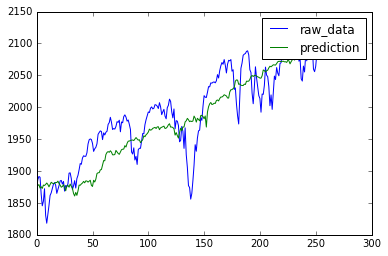

In [188]:
from itertools import izip


def train(lstm, model, optimizer, x_train, y_train, N_epoch=10):
    print_every = N_epoch / 10
    predicted = []
    x_v = Variable(np.array(x_train, dtype=np.float32))
    y_v = Variable(np.array(y_train, dtype=np.float32))
    
    for epoch in range(N_epoch):
        lstm.reset_state()
        model.zerograds()
        loss = model(x_v, y_v)
        loss.backward()
        optimizer.update()
        
        if (epoch + 1) % print_every == 0:
            print ("epoch: %d" % (epoch + 1))
            print ("loss=", loss.data)
            

N_data = int(0.5 * len(input_data))
train_input = input_data[:N_data]
train_target = target_data[:N_data]
test_input = input_data[N_data:]
test_target = target_data[N_data:]
df_input = train_input[1:] / train_input[:-1]
df_target = train_target[1:] / train_target[:-1]
df_target = df_target.reshape(len(df_target), 1)

N_in = len(input_list)
N_middle=int(0.5 * N_in)
N_out = 1

N_epoch = 1000
lstm = LSTM()
model = Regression(lstm)
optimizer = optimizers.Adam()
optimizer.setup(model)

train(lstm, model, optimizer, df_input, df_target, N_epoch=N_epoch)

lstm.reset_state()
output = model.predictor(Variable(np.array(df_input, dtype=np.float32)))
prediction = train_target[0] * np.r_[1.0, np.cumprod(output.data)]

plt.plot(train_target, label="raw_data")
plt.plot(prediction, label="prediction")
plt.legend()

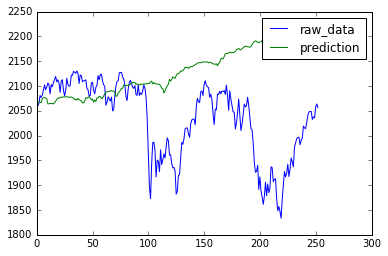

In [189]:
test_df = test_input[1:] / test_input[:-1]
test_df = np.array(test_df, dtype=np.float32)

lstm.reset_state()
output = model.predictor(Variable(test_df))
prediction = test_target[0] * np.r_[1.0, np.cumprod(output.data)]

plt.plot(test_target, label="raw_data")
plt.plot(prediction, label="prediction")
plt.legend()

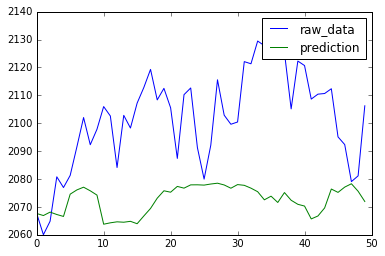

In [190]:
plt.plot(test_target[:50], label="raw_data")
plt.plot(prediction[:50], label="prediction")
plt.legend()

In [170]:
class LSTM2(Chain):
    def __init__(self):
        super(LSTM2, self).__init__(
            input = L.Linear(N_in, N_middle),
            mid = L.LSTM(N_middle, N_middle),
            output = L.Linear(N_middle, N_out),
        )
        
    def reset_state(self):
        self.mid.reset_state()
    
    def __call__(self, x):
        h1 = F.sigmoid(self.input(x))
        h2 = F.sigmoid(self.mid(h1))
        y = self.output(h2)
        return y
    
class Regression(Chain):
    def __init__(self, predictor):
        super(Regression, self).__init__(predictor=predictor)
        
    def __call__(self, x, y):
        output = self.predictor(x)
        self.loss = F.mean_squared_error(output, y)
        return self.loss

epoch: 100
loss= 6.09055969107e-05
epoch: 200
loss= 5.05833377247e-05
epoch: 300
loss= 5.05821190018e-05
epoch: 400
loss= 5.05819589307e-05
epoch: 500
loss= 5.05810203322e-05
epoch: 600
loss= 5.05802418047e-05
epoch: 700
loss= 5.05795978825e-05
epoch: 800
loss= 5.05791431351e-05
epoch: 900
loss= 5.05781790707e-05
epoch: 1000
loss= 5.05772186443e-05


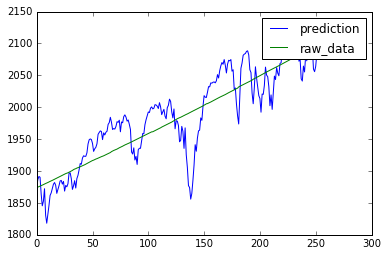

In [171]:
N_data = int(0.5 * len(input_data))
train_input = input_data[:N_data]
train_target = target_data[:N_data]
test_input = input_data[N_data:]
test_target = target_data[N_data:]
df_input = train_input[1:] / train_input[:-1]
df_target = train_target[1:] / train_target[:-1]
df_target = df_target.reshape(len(df_target), 1)

N_in = len(input_list)
N_middle=int(0.5 * N_in)
N_out = 1

N_epoch = 1000
lstm = LSTM2()
model = Regression(lstm)
optimizer = optimizers.Adam()
optimizer.setup(model)

train(lstm, model, optimizer, df_input, df_target, N_epoch=N_epoch)

lstm.reset_state()
output = model.predictor(Variable(np.array(df_input, dtype=np.float32)))
prediction = train_target[0] * np.r_[1.0, np.cumprod(output.data)]

plt.plot(train_target, label="raw_data")
plt.plot(prediction, label="prediction")
plt.legend()

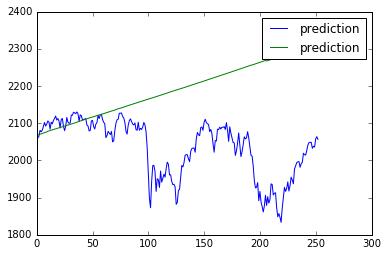

In [172]:
test_df = test_input[1:] / test_input[:-1]
test_df = np.array(test_df, dtype=np.float32)

lstm.reset_state()
output = model.predictor(Variable(test_df))
prediction = test_target[0] * np.r_[1.0, np.cumprod(output.data)]

plt.plot(test_target, label="raw_data")
plt.plot(prediction, label="prediction")
plt.legend()

# Normalization

In [174]:
def normalization(data):
    mean = np.mean(data, axis=0)
    dev = np.sqrt(np.var(data, axis=0))
    norm_data = (data - mean) / dev
    return norm_data, mean, dev

epoch: 100
loss= 0.00264965975657
epoch: 200
loss= 0.000120905373478
epoch: 300
loss= 2.65749040409e-05
epoch: 400
loss= 1.43966951782e-06
epoch: 500
loss= 1.15803450171e-05
epoch: 600
loss= 8.20514785005e-08
epoch: 700
loss= 3.16886406004e-09
epoch: 800
loss= 1.42733963537e-10
epoch: 900
loss= 4.763213695e-12
epoch: 1000
loss= 2.45786518308e-13


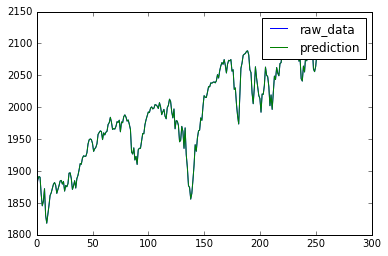

In [195]:
N_data = int(0.5 * len(input_data))
train_input = input_data[:N_data]
train_target = target_data[:N_data]
test_input = input_data[N_data:]
test_target = target_data[N_data:]
df_input = np.log(train_input[1:] / train_input[:-1])
df_target = np.log(train_target[1:] / train_target[:-1])
df_target = df_target.reshape(len(df_target), 1)

df_input_tilde, mean_ipt, dev_ipt = normalization(df_input)
df_target_tilde, mean_tgt, dev_tgt = normalization(df_target)

N_in = len(input_list)
N_middle=int(0.2 * N_in)
N_out = 1

N_epoch = 1000
lstm = LSTM()
model = Regression(lstm)
optimizer = optimizers.Adam()
optimizer.setup(model)

train(lstm, model, optimizer, df_input_tilde, df_target_tilde, N_epoch=N_epoch)

lstm.reset_state()
output = model.predictor(Variable(np.array(df_input_tilde, dtype=np.float32)))
output = dev_tgt * output + mean_tgt
prediction = train_target[0] * np.r_[1.0, np.cumprod(np.exp(output.data))]

plt.plot(train_target, label="raw_data")
plt.plot(prediction, label="prediction")
plt.legend()

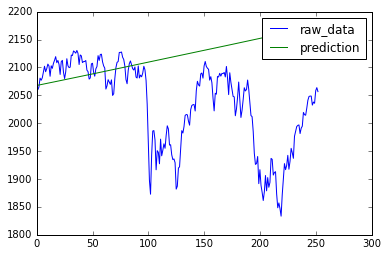

In [199]:
test_df = np.log(test_input[1:] / test_input[:-1])
test_df = (test_df - mean_ipt) * dev_ipt
test_df = np.array(test_df, dtype=np.float32)

lstm.reset_state()
output = model.predictor(Variable(test_df))
output = dev_tgt * output + mean_tgt
prediction = test_target[0] * np.r_[1.0, np.cumprod(np.exp(output.data))]

plt.plot(test_target, label="raw_data")
plt.plot(prediction, label="prediction")
plt.legend()

# without normalization

epoch: 100
loss= 5.65715367884e-08
epoch: 200
loss= 1.21866611854e-12
epoch: 300
loss= 6.61109569866e-11
epoch: 400
loss= 4.42386800681e-15
epoch: 500
loss= 3.36372107945e-09
epoch: 600
loss= 1.86865469929e-13
epoch: 700
loss= 3.7826811905e-08
epoch: 800
loss= 6.74638798159e-08
epoch: 900
loss= 1.21603695538e-13
epoch: 1000
loss= 3.30422466277e-07


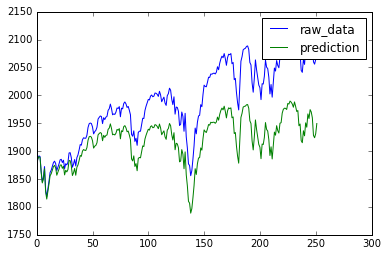

In [202]:
N_data = int(0.5 * len(input_data))
train_input = input_data[:N_data]
train_target = target_data[:N_data]
test_input = input_data[N_data:]
test_target = target_data[N_data:]
df_input = np.log(train_input[1:] / train_input[:-1])
df_target = np.log(train_target[1:] / train_target[:-1])
df_target = df_target.reshape(len(df_target), 1)

N_in = len(input_list)
N_middle=int(0.2 * N_in)
N_out = 1

N_epoch = 1000
lstm = LSTM()
model = Regression(lstm)
optimizer = optimizers.Adam()
optimizer.setup(model)

train(lstm, model, optimizer, df_input, df_target, N_epoch=N_epoch)

lstm.reset_state()
output = model.predictor(Variable(np.array(df_input, dtype=np.float32)))
prediction = train_target[0] * np.r_[1.0, np.cumprod(np.exp(output.data))]

plt.plot(train_target, label="raw_data")
plt.plot(prediction, label="prediction")
plt.legend()

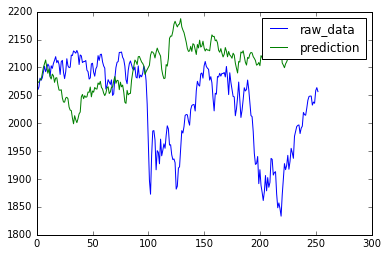

In [203]:
test_df = np.log(test_input[1:] / test_input[:-1])
test_df = np.array(test_df, dtype=np.float32)

lstm.reset_state()
output = model.predictor(Variable(test_df))
prediction = test_target[0] * np.r_[1.0, np.cumprod(np.exp(output.data))]

plt.plot(test_target, label="raw_data")
plt.plot(prediction, label="prediction")
plt.legend()

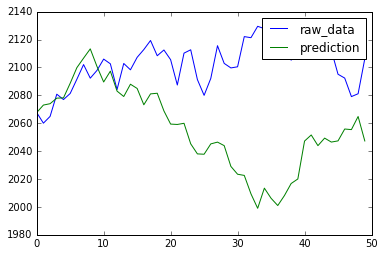

In [204]:
plt.plot(test_target[:50], label="raw_data")
plt.plot(prediction[:50], label="prediction")
plt.legend()

In [205]:
from itertools import izip


def online_train(lstm, model, optimizer, x_train, y_train, 
                             N_memory=100, renew_freq=10, N_epoch=10):
    print_every = N_epoch / 10
    predicted = []
    df_input = np.log(x_train[1:] / x_train[:-1])
    df_target = np.log(y_train[1:] / y_train[:-1])
    
    N_data = len(df_input)
    N_renew = N_data / renew_freq
    begin = 0
    for i in xrange(N_renew):
        end = (i + 1) * renew_freq
        #fix the number of data used for learning
        if end > N_memory:
            begin  = end - N_memory
        x_v = Variable(np.array(df_input[begin: end], dtype=np.float32))
        y_v = Variable(np.array(df_target[begin: end], dtype=np.float32))
        for epoch in range(N_epoch):
            lstm.reset_state()
            model.zerograds()
            loss = model(x_v, y_v)
            loss.backward()
            optimizer.update()
        
            if (epoch + 1) % print_every == 0:
                print ("epoch: %d" % (epoch + 1))
                print ("loss=", loss.data)
                
        lstm.reset_state()
        output = model.predictor(Variable(np.array(df_input_tilde, dtype=np.float32)))
        prediction = y_train[0] * np.r_[1.0, np.cumprod(np.exp(output.data))]
    N_data = int(0.5 * len(x_data.data))
train_input = input_data[:N_data]
train_target = target_data[:N_data]
test_input = input_data[N_data:]
test_target = target_data[N_data:]
df_input = np.log(train_input[1:] / train_input[:-1])
df_target = np.log(train_target[1:] / train_target[:-1])
df_target = df_target.reshape(len(df_target), 1)

df_input_tilde, mean_ipt, dev_ipt = normalization(df_input)
df_target_tilde, mean_tgt, dev_tgt = normalization(df_target)

N_in = len(input_list)
N_middle=int(0.2 * N_in)
N_out = 1

N_epoch = 1000
lstm = LSTM()
model = Regression(lstm)
optimizer = optimizers.Adam()
optimizer.setup(model)

train(lstm, model, optimizer, df_input_tilde, df_target_tilde, N_epoch=N_epoch)

lstm.reset_state()
output = model.predictor(Variable(np.array(df_input_tilde, dtype=np.float32)))
output = dev_tgt * output + mean_tgt
prediction = train_target[0] * np.r_[1.0, np.cumprod(np.exp(output.data))]

plt.plot(train_target, label="raw_data")
plt.plot(prediction, label="prediction")
plt.legend() 